In [24]:
import h5py
import numpy as np
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
from astropy.constants import G
import astropy.units as u
import matplotlib
from glob import glob
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.ticker import LogFormatterSciNotation


import matplotlib as mpl
matplotlib.matplotlib_fname()
mpl.rc_file('../Mike_rc_params')

In [10]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # AASTeX default is close to Times
    "mathtext.fontset": "cm",           # Computer Modern math to match LaTeX
    "text.usetex": False,               # Set to True if you're using LaTeX labels and have a TeX install
    "font.size": 15,                    # Base font size (matches AASTeX main text)
    "axes.labelsize": 15,
    "axes.titlesize": 20,
    "axes.titlepad": 12,      
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.dpi": 300,                  # Higher resolution for journal-quality figs
    "axes.linewidth": 1.0,              # Consistent with figure lines
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})


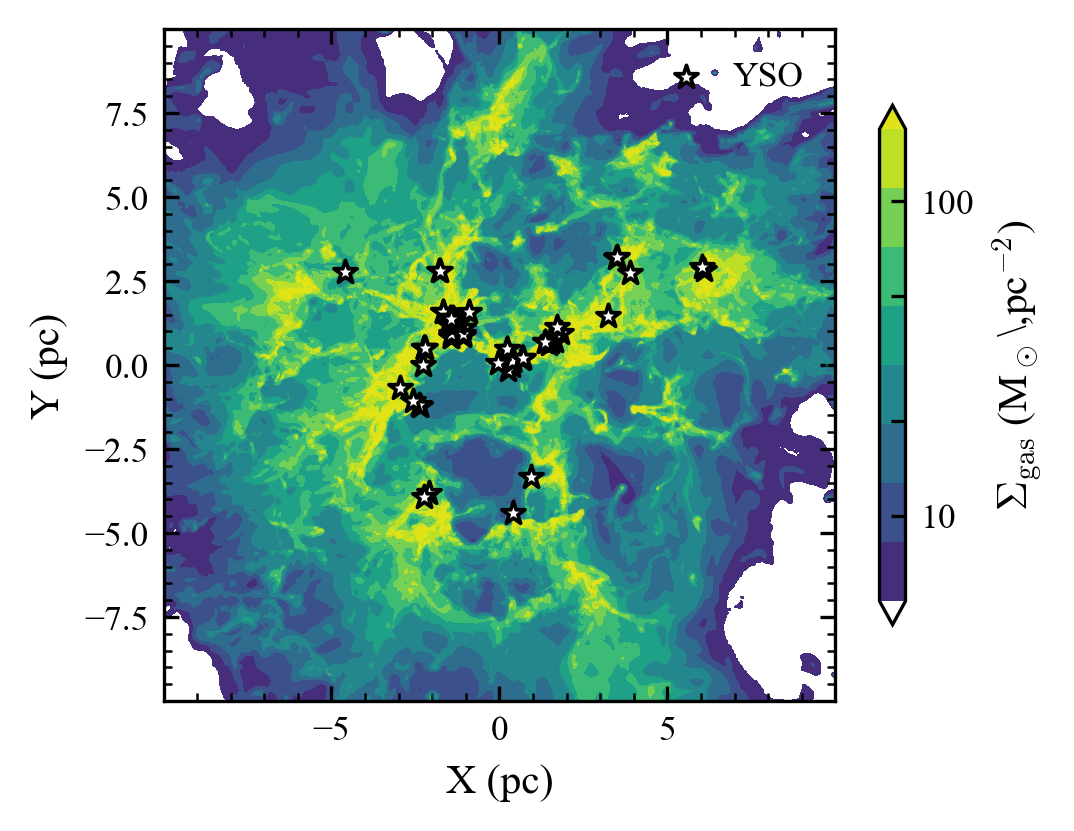

Levels used: [5.354, 8.244, 12.69, 19.54, 30.09, 46.33, 71.34, 109.9, 169.1]
vmin, vmax: 5.3538306873576165 169.1431665978574


In [38]:
import h5py, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, ListedColormap

# ===== RC for 1-col =====
plt.rcParams.update({
    "font.family": "serif", "font.serif": ["Times New Roman"],
    "mathtext.fontset": "cm", "text.usetex": False, "font.size": 9.5,
    "axes.labelsize": 10, "axes.titlesize": 11, "axes.linewidth": 0.8,
    "xtick.labelsize": 8.5, "ytick.labelsize": 8.5,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.major.size": 3.5, "ytick.major.size": 3.5,
    "xtick.major.width": 0.8, "ytick.major.width": 0.8,
    "legend.fontsize": 8.5, "legend.frameon": False, "figure.dpi": 300,
})
FIGSIZE = (3.5, 3.5)

def truncate_cmap(cmap, lo=0.08, hi=0.95, N=256):
    return ListedColormap(cmap(np.linspace(lo, hi, N)))

# ===== Load =====
with h5py.File("snaps/YSOobjects/snapshot_3000.YSOobjects.hdf5") as A:
    YSO_X, YSO_Y = A["X_pc"][:], A["Y_pc"][:]
with h5py.File("snaps/test_high_dustemission/snapshot_3000.dustemission.hdf5") as F:
    X, Y = F["X_pc"][:], F["Y_pc"][:]
    S = F["SurfaceDensity_Msun_pc2"][:]  # Σ_gas [M☉ pc^-2]
with h5py.File("./snaps/snapshot_3000.hdf5") as H:
    L = float(H["Header"].attrs["BoxSize"])

# ===== Mask + adaptive log window clipped to [5, 1000] =====
valid = np.isfinite(S) & (S > 0)
S = np.where(valid, S, np.nan)

p_lo, p_hi = np.nanpercentile(S, [10, 98])
vmin = max(5.0, float(p_lo))       # keep ≥5 but don’t force too low
vmax = min(1000.0, float(p_hi))    # keep ≤1000 but don’t force too high
if vmax <= vmin:                    # fallback if distribution is too tight
    vmax = vmin * 10.0

# discrete log bins (calm)
NBINS = 8
levels = np.logspace(np.log10(vmin), np.log10(vmax), NBINS+1)

# Colormap (trimmed) + under/bad = white
cmap = truncate_cmap(mpl.cm.viridis)
cmap.set_under("white")
cmap.set_bad("white")

norm = LogNorm(vmin=vmin, vmax=vmax)

# ===== Plot =====
fig, ax = plt.subplots(figsize=FIGSIZE)

# Filled map only
cf = ax.contourf(L/2 - X, L/2 - Y, S,
                 levels=levels, cmap=cmap, norm=norm,
                 antialiased=False, extend="both", zorder=1)

# Single mid-level outline in a muted color from the cmap
mid_level = np.sqrt(vmin * vmax)
ax.contour(L/2 - X, L/2 - Y, S, levels=[mid_level],
           colors=[cmap(0.35)], linewidths=0.5, alpha=0.5, zorder=2)

# YSOs: white star + black edge
ax.scatter(L/2 - YSO_X, L/2 - YSO_Y,
           s=34, marker="*", facecolor="white", edgecolor="black",
           linewidths=0.9, zorder=3, label="YSO")
ax.legend(loc="upper right", handlelength=1.0)

# Slim, spaced, readable log colorbar
cbar = fig.colorbar(cf, ax=ax, pad=0.06, fraction=0.035)
cbar.set_label(r"$\Sigma_{\rm gas}$ (M$_\odot$\,pc$^{-2}$)")
ticks_all = np.array([5,10,20,50,100,200,500,1000], dtype=float)
ticks = ticks_all[(ticks_all >= vmin) & (ticks_all <= vmax)]
cbar.set_ticks(ticks)
cbar.ax.yaxis.set_major_formatter(mticker.LogFormatterMathtext(base=10))
cbar.minorticks_off()

# Axes
ax.set_aspect("equal")
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")

plt.tight_layout(pad=0.45)
plt.show()

print("Levels used:", [float(f"{lv:.4g}") for lv in levels])
print("vmin, vmax:", vmin, vmax)


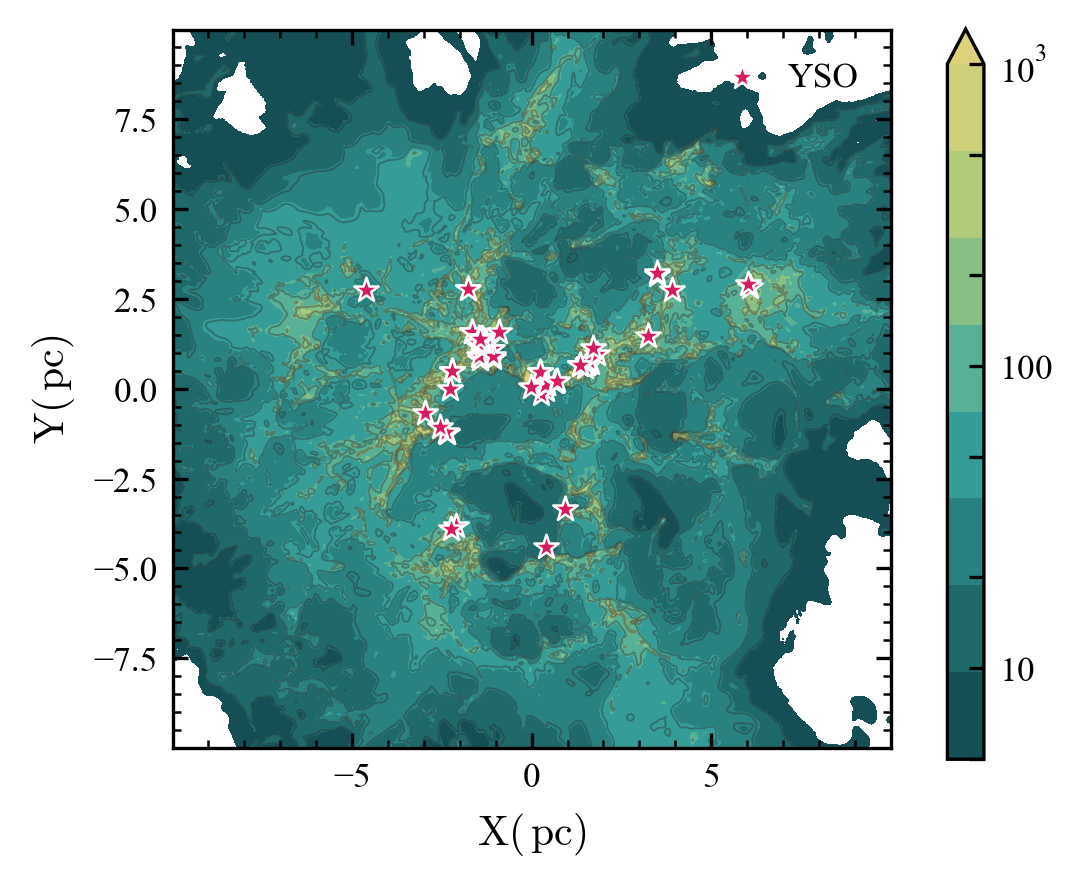

In [78]:
import h5py, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, ListedColormap

# ========= 1-column rcParams (match your paper style) =========
plt.rcParams.update({
    "font.family": "serif", "font.serif": ["Times New Roman"],
    "mathtext.fontset": "cm", "text.usetex": False,
    "font.size": 9.5,
    "axes.labelsize": 10, "axes.titlesize": 11, "axes.linewidth": 0.8,
    "xtick.labelsize": 8.5, "ytick.labelsize": 8.5,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.major.size": 3.5, "ytick.major.size": 3.5,
    "xtick.major.width": 0.8, "ytick.major.width": 0.8,
    "legend.fontsize": 8.5, "legend.frameon": False,
    "figure.dpi": 300,
})
FIGSIZE = (3.5, 3.5)

# ---- helpers (same pattern as your main fig) ----
def truncate_cmap(cmap, vmin=0.07, vmax=0.95, N=256):
    return ListedColormap(cmap(np.linspace(vmin, vmax, N)))

def make_tealgold():
    stops = ["#0b2e3b", "#216e6e", "#3aa6a0", "#a6c97a", "#ead47a"]
    return mpl.colors.LinearSegmentedColormap.from_list("tealgold", stops, N=256)

# colormap
cmap = truncate_cmap(make_tealgold(), 0.07, 0.95)

# ========= Load =========
with h5py.File("snaps/YSOobjects/snapshot_3000.YSOobjects.hdf5") as A:
    YSO_X, YSO_Y = A["X_pc"][:], A["Y_pc"][:]
with h5py.File("snaps/test_high_dustemission/snapshot_3000.dustemission.hdf5") as F:
    X, Y, S = F["X_pc"][:], F["Y_pc"][:], F["SurfaceDensity_Msun_pc2"][:]
with h5py.File("./snaps/snapshot_3000.hdf5") as H:
    L = float(H["Header"].attrs["BoxSize"])

valid = np.isfinite(S) & (S > 0)
S = np.where(valid, S, np.nan)

# ========= Scaling & levels =========
vmin, vmax = 5.0, 1000.0
norm = LogNorm(vmin=vmin, vmax=vmax)
levels_fill = np.logspace(np.log10(vmin), np.log10(vmax), 9)
levels_cont = np.array([10, 20, 40, 80, 160, 320], float)

# ========= Plot =========
fig, ax = plt.subplots(figsize=FIGSIZE)

# Filled map
cf = ax.contourf(L/2 - X, L/2 - Y, S,
                 levels=levels_fill, cmap=cmap, norm=norm,
                 antialiased=False, extend="max", zorder=1)

# Subtle contours
ax.contour(L/2 - X, L/2 - Y, S,
           levels=levels_cont, colors="#2b2b2b",
           linewidths=0.45, alpha=0.38, zorder=2)

# YSOs
ax.scatter(L/2 - YSO_X, L/2 - YSO_Y,
           s=38, marker="*", facecolor="#D81B60", edgecolor="white",
           linewidths=0.6, zorder=3, label="YSO")
ax.legend(loc="upper right", handlelength=1.0)

# ========= Colorbar (match your main figure geometry) =========
# fraction controls width; pad controls whitespace; shrink=1 for full height
cbar = fig.colorbar(cf, ax=ax, fraction=0.045, pad=0.07, shrink=1.0)
ticks = [5, 10, 20, 50, 100, 200, 500, 1000]
cbar.set_ticks(ticks)
cbar.ax.yaxis.set_major_formatter(mticker.LogFormatterMathtext(base=10))
cbar.minorticks_off()
cbar.ax.tick_params(labelsize=plt.rcParams["xtick.labelsize"])

# Axes
ax.set_aspect("equal")
ax.set_xlabel(r"$\rm X (\, \rm pc)$")
ax.set_ylabel(r"$\rm Y (\, \rm pc)$")
plt.tight_layout(pad=0.35)
plt.show()
fig.savefig("map_teal_consistent.png", bbox_inches="tight")


/var/folders/g4/b3gtnddx08d461bc9l775lnr0000gn/T/ipykernel_67991/2573917249.py:164: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.35)


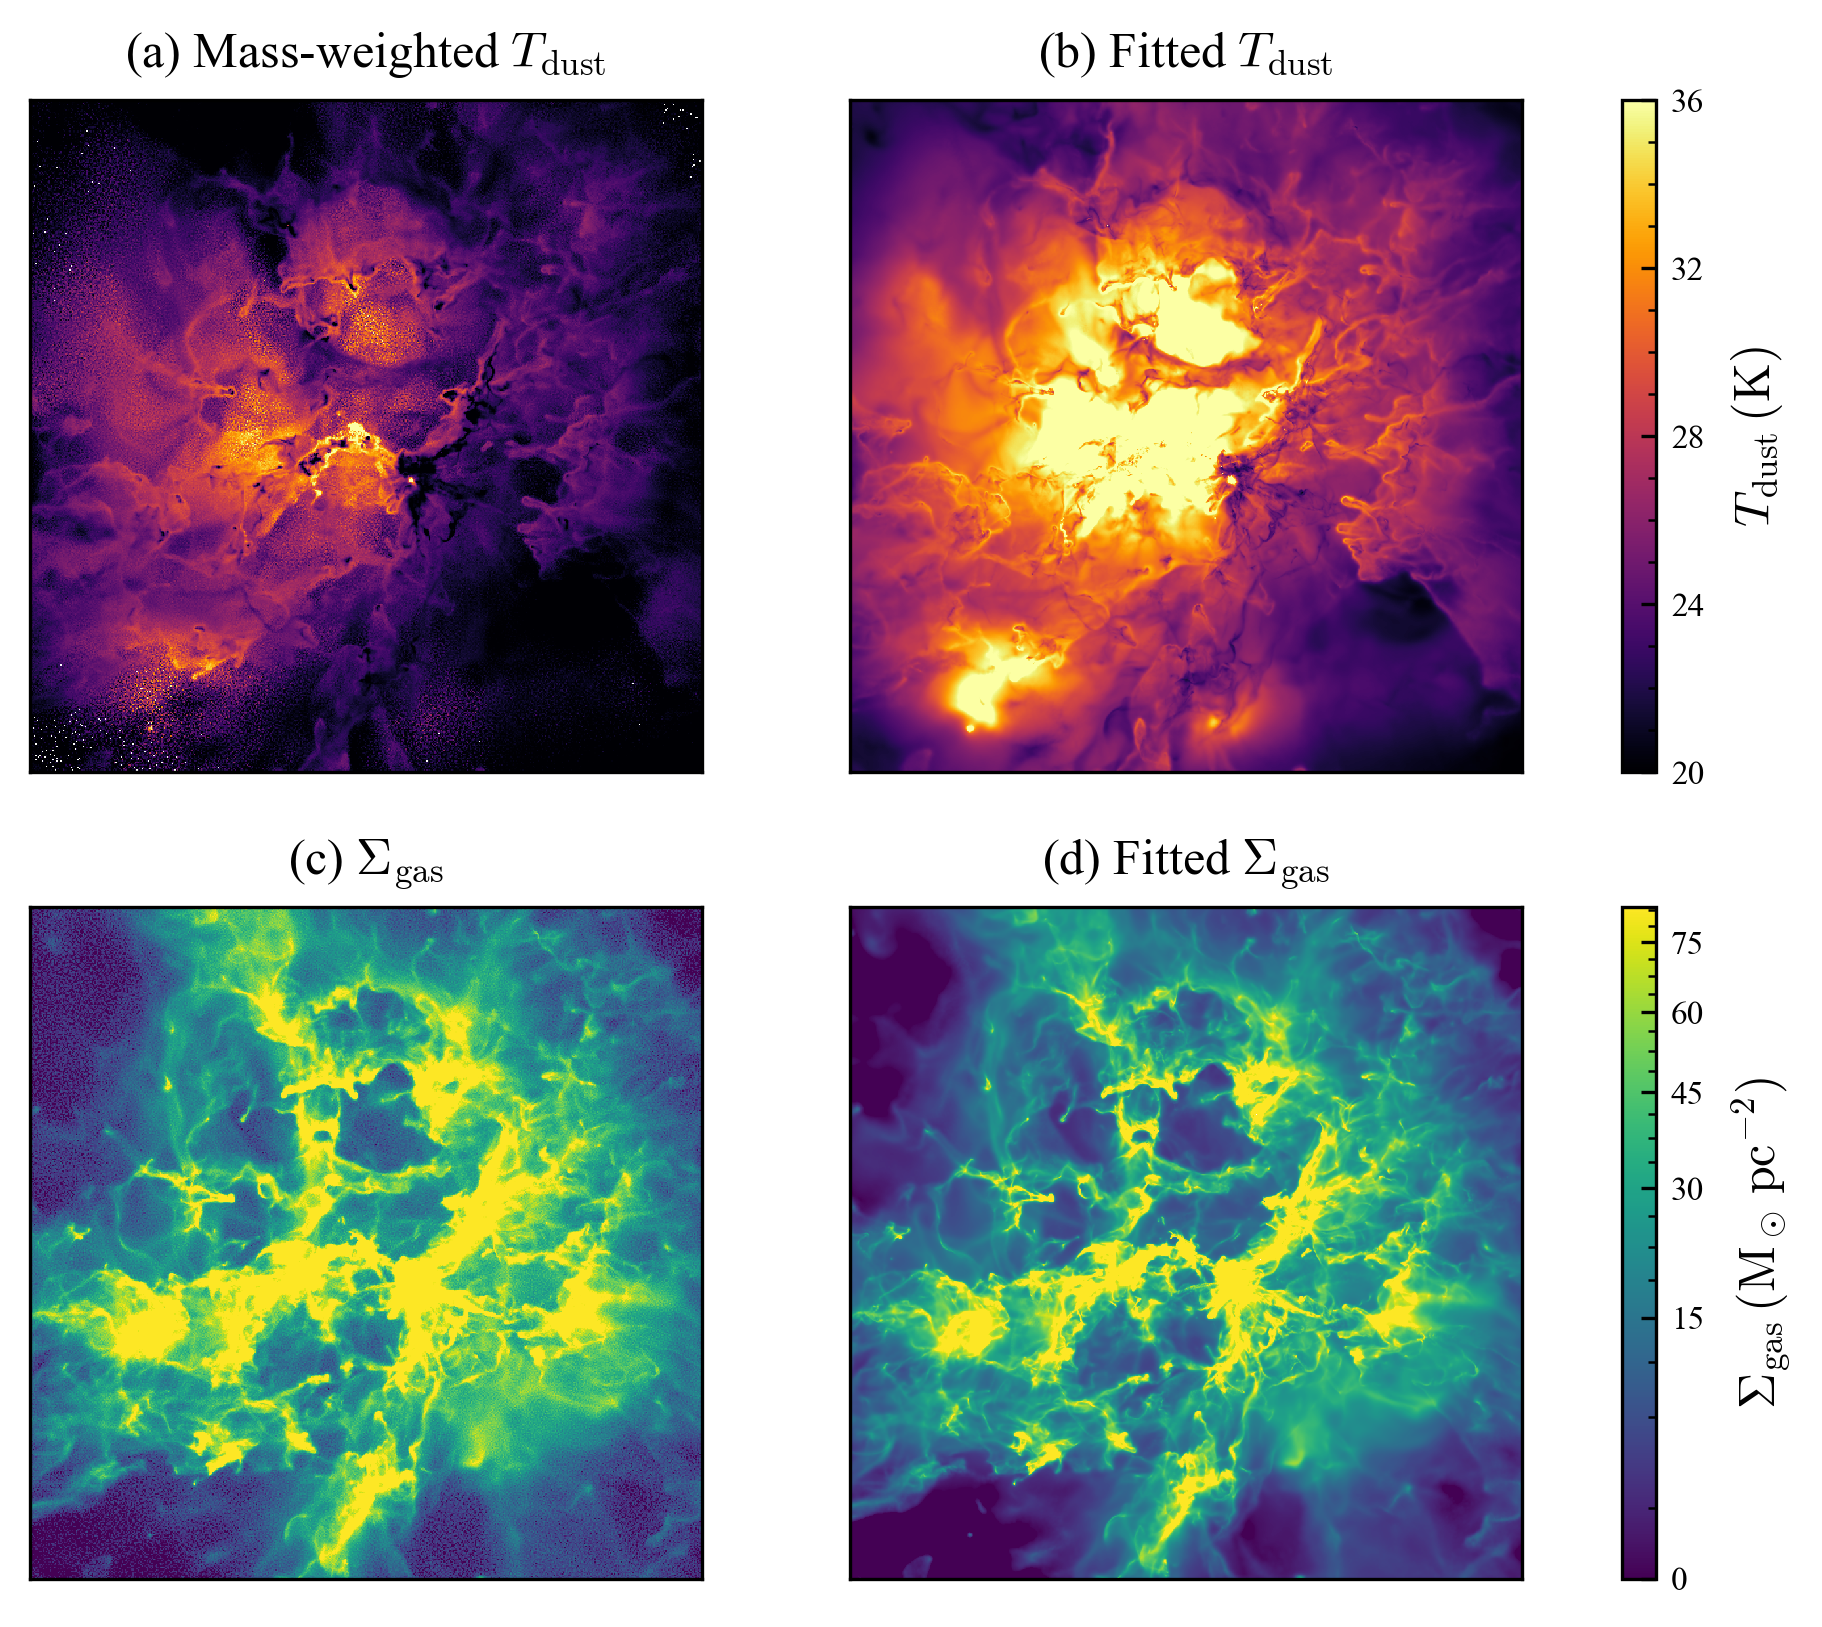

In [84]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator

# --- journal-ish rc for 2-col figures ---
mpl.rcParams.update({
    "figure.dpi": 300,
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
})

# =========================
# Tunable display parameters
# =========================
TEMP_PCT    = (5, 95)
SIGMA_PCT   = (5, 95)
SIGMA_GAMMA = 0.5
CMAP_T, CMAP_S = "inferno", "viridis"

# =========================
# Load particle snapshot
# =========================
with h5py.File("snaps/snapshot_3000.hdf5", "r") as F:
    dust_temp = F["PartType0/Dust_Temperature"][:]  # K
    coords    = F["PartType0/Coordinates"][:]       # pc
    masses    = F["PartType0/Masses"][:]            # M_sun

# Domain & grid
x_min, x_max = 40., 60.
y_min, y_max = 40., 60.
n_pix = 512
x_edges = np.linspace(x_min, x_max, n_pix + 1)
y_edges = np.linspace(y_min, y_max, n_pix + 1)
dx, dy = x_edges[1] - x_edges[0], y_edges[1] - y_edges[0]
pix_area_pc2 = dx * dy

# Select & bin
mask = ((coords[:, 0] >= x_min) & (coords[:, 0] <= x_max) &
        (coords[:, 1] >= y_min) & (coords[:, 1] <= y_max))
x_in, y_in = coords[mask, :2].T
temp_in    = dust_temp[mask]
mass_in    = masses[mask]

# --- Simulation maps ---
sum_massT, _, _ = np.histogram2d(y_in, x_in, bins=[y_edges, x_edges], weights=mass_in * temp_in)
sum_mass,  _, _ = np.histogram2d(y_in, x_in, bins=[y_edges, x_edges], weights=mass_in)
with np.errstate(divide="ignore", invalid="ignore"):
    T_mass_weighted = np.ma.masked_invalid(sum_massT / sum_mass)   # mass-weighted T_dust
Sigma_gas_sim = np.ma.masked_invalid(sum_mass / pix_area_pc2)      # Σ_gas (simulation)

# Shift frame by −50 pc
x_edges_plot = x_edges - 50.0
y_edges_plot = y_edges - 50.0

# =========================
# Load fitted maps
# =========================
with h5py.File("snaps/test_high_dustemission/snapshot_3000.dustemission.hdf5", "r") as F:
    X_grid = F["X_pc"][:]
    Y_grid = F["Y_pc"][:]
    Tau500 = F["Fit_Tau500um"][:]
    T_fit  = F["Fit_Tdust"][:]

# --- Fitted maps ---
Sigma_gas_fit = (Tau500 / 0.1) * 4.78e4
T_fit_mask    = np.ma.masked_invalid(T_fit)
Sigma_gas_fit = np.ma.masked_invalid(Sigma_gas_fit)

X_plot = X_grid - 50.0
Y_plot = Y_grid - 50.0

# =========================
# Shared limits per row
# =========================
# Temperature limits
if T_mass_weighted.count() and T_fit_mask.count():
    T_all = np.concatenate([T_mass_weighted.compressed(), T_fit_mask.compressed()])
else:
    T_all = np.array([0.0, 1.0])
T_vmin, T_vmax = np.percentile(T_all, TEMP_PCT)
if not np.isfinite(T_vmin) or not np.isfinite(T_vmax) or T_vmax <= T_vmin:
    T_vmin = float(np.nanmin(T_all)); T_vmax = float(np.nanmax(T_all))
T_vmin, T_vmax = np.floor(T_vmin), np.ceil(T_vmax)
if T_vmax <= T_vmin: T_vmax = T_vmin + 1.0

# Σ_gas limits
S_sim = Sigma_gas_sim.compressed()
S_fit = Sigma_gas_fit.compressed()
S_all = np.concatenate([S_sim, S_fit]) if (S_sim.size and S_fit.size) else np.array([1e-3, 1.0])
S_vmin, S_vmax = np.percentile(S_all, SIGMA_PCT)
if not np.isfinite(S_vmin) or not np.isfinite(S_vmax) or S_vmax <= S_vmin:
    S_vmin = float(np.nanmin(S_all)); S_vmax = float(np.nanmax(S_all))

Sigma_gas_sim_plot = np.ma.clip(Sigma_gas_sim, S_vmin, S_vmax)
Sigma_gas_fit_plot = np.ma.clip(Sigma_gas_fit, S_vmin, S_vmax)
norm_S = colors.PowerNorm(gamma=SIGMA_GAMMA, vmin=S_vmin, vmax=S_vmax)

# =========================
# Figure (two-column width)
# =========================
fig = plt.figure(figsize=(7.2, 6.4))
gs  = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 0.045],
               height_ratios=[1, 1], hspace=0.20, wspace=0.10)

# ----- TOP: Temperature -----
ax_T_sim = fig.add_subplot(gs[0, 0])
ax_T_fit = fig.add_subplot(gs[0, 1])
ax_T_cax = fig.add_subplot(gs[0, 2])

im_T_sim = ax_T_sim.pcolormesh(
    x_edges_plot, y_edges_plot, T_mass_weighted,
    cmap=CMAP_T, vmin=T_vmin, vmax=T_vmax, shading="auto"
)
ax_T_sim.set_title(r"(a) Mass-weighted $T_{\rm dust}$", fontsize=12)
ax_T_sim.set_aspect("equal"); ax_T_sim.set_xticks([]); ax_T_sim.set_yticks([])

im_T_fit = ax_T_fit.pcolormesh(
    X_plot, Y_plot, T_fit_mask,
    cmap=CMAP_T, vmin=T_vmin, vmax=T_vmax, shading="auto"
)
ax_T_fit.set_title(r"(b) Fitted $T_{\rm dust}$", fontsize=12)
ax_T_fit.set_aspect("equal"); ax_T_fit.set_xticks([]); ax_T_fit.set_yticks([])

T_locator = MaxNLocator(nbins=5)
cbar_T = fig.colorbar(im_T_fit, cax=ax_T_cax, orientation="vertical")
cbar_T.set_label(r"$T_{\rm dust}\,(\rm K)$", labelpad=6, fontsize=12)
cbar_T.ax.yaxis.set_major_locator(T_locator)

# ----- BOTTOM: Surface density (Σ_gas) -----
ax_S_sim = fig.add_subplot(gs[1, 0])
ax_S_fit = fig.add_subplot(gs[1, 1])
ax_S_cax = fig.add_subplot(gs[1, 2])

im_S_sim = ax_S_sim.pcolormesh(
    x_edges_plot, y_edges_plot, Sigma_gas_sim_plot,
    cmap=CMAP_S, norm=norm_S, shading="auto"
)
ax_S_sim.set_title(r"(c) $\Sigma_{\rm gas}$", fontsize=12)
ax_S_sim.set_aspect("equal"); ax_S_sim.set_xticks([]); ax_S_sim.set_yticks([])

im_S_fit = ax_S_fit.pcolormesh(
    X_plot, Y_plot, Sigma_gas_fit_plot,
    cmap=CMAP_S, norm=norm_S, shading="auto"
)
ax_S_fit.set_title(r"(d) Fitted $\Sigma_{\rm gas}$", fontsize=12)
ax_S_fit.set_aspect("equal"); ax_S_fit.set_xticks([]); ax_S_fit.set_yticks([])

S_locator = MaxNLocator(nbins=6)
cbar_S = fig.colorbar(im_S_fit, cax=ax_S_cax, orientation="vertical")
cbar_S.set_label(r"$\Sigma_{\rm gas}\,(\rm M_\odot\,pc^{-2})$", labelpad=6, fontsize=12)
cbar_S.ax.yaxis.set_major_locator(S_locator)

# Slim spines
for ax in (ax_T_sim, ax_T_fit, ax_S_sim, ax_S_fit):
    for s in ax.spines.values(): s.set_linewidth(0.8)

plt.tight_layout(pad=0.35)
plt.savefig("four_panel_linear_sigma.png", dpi=300, bbox_inches="tight")
plt.show()


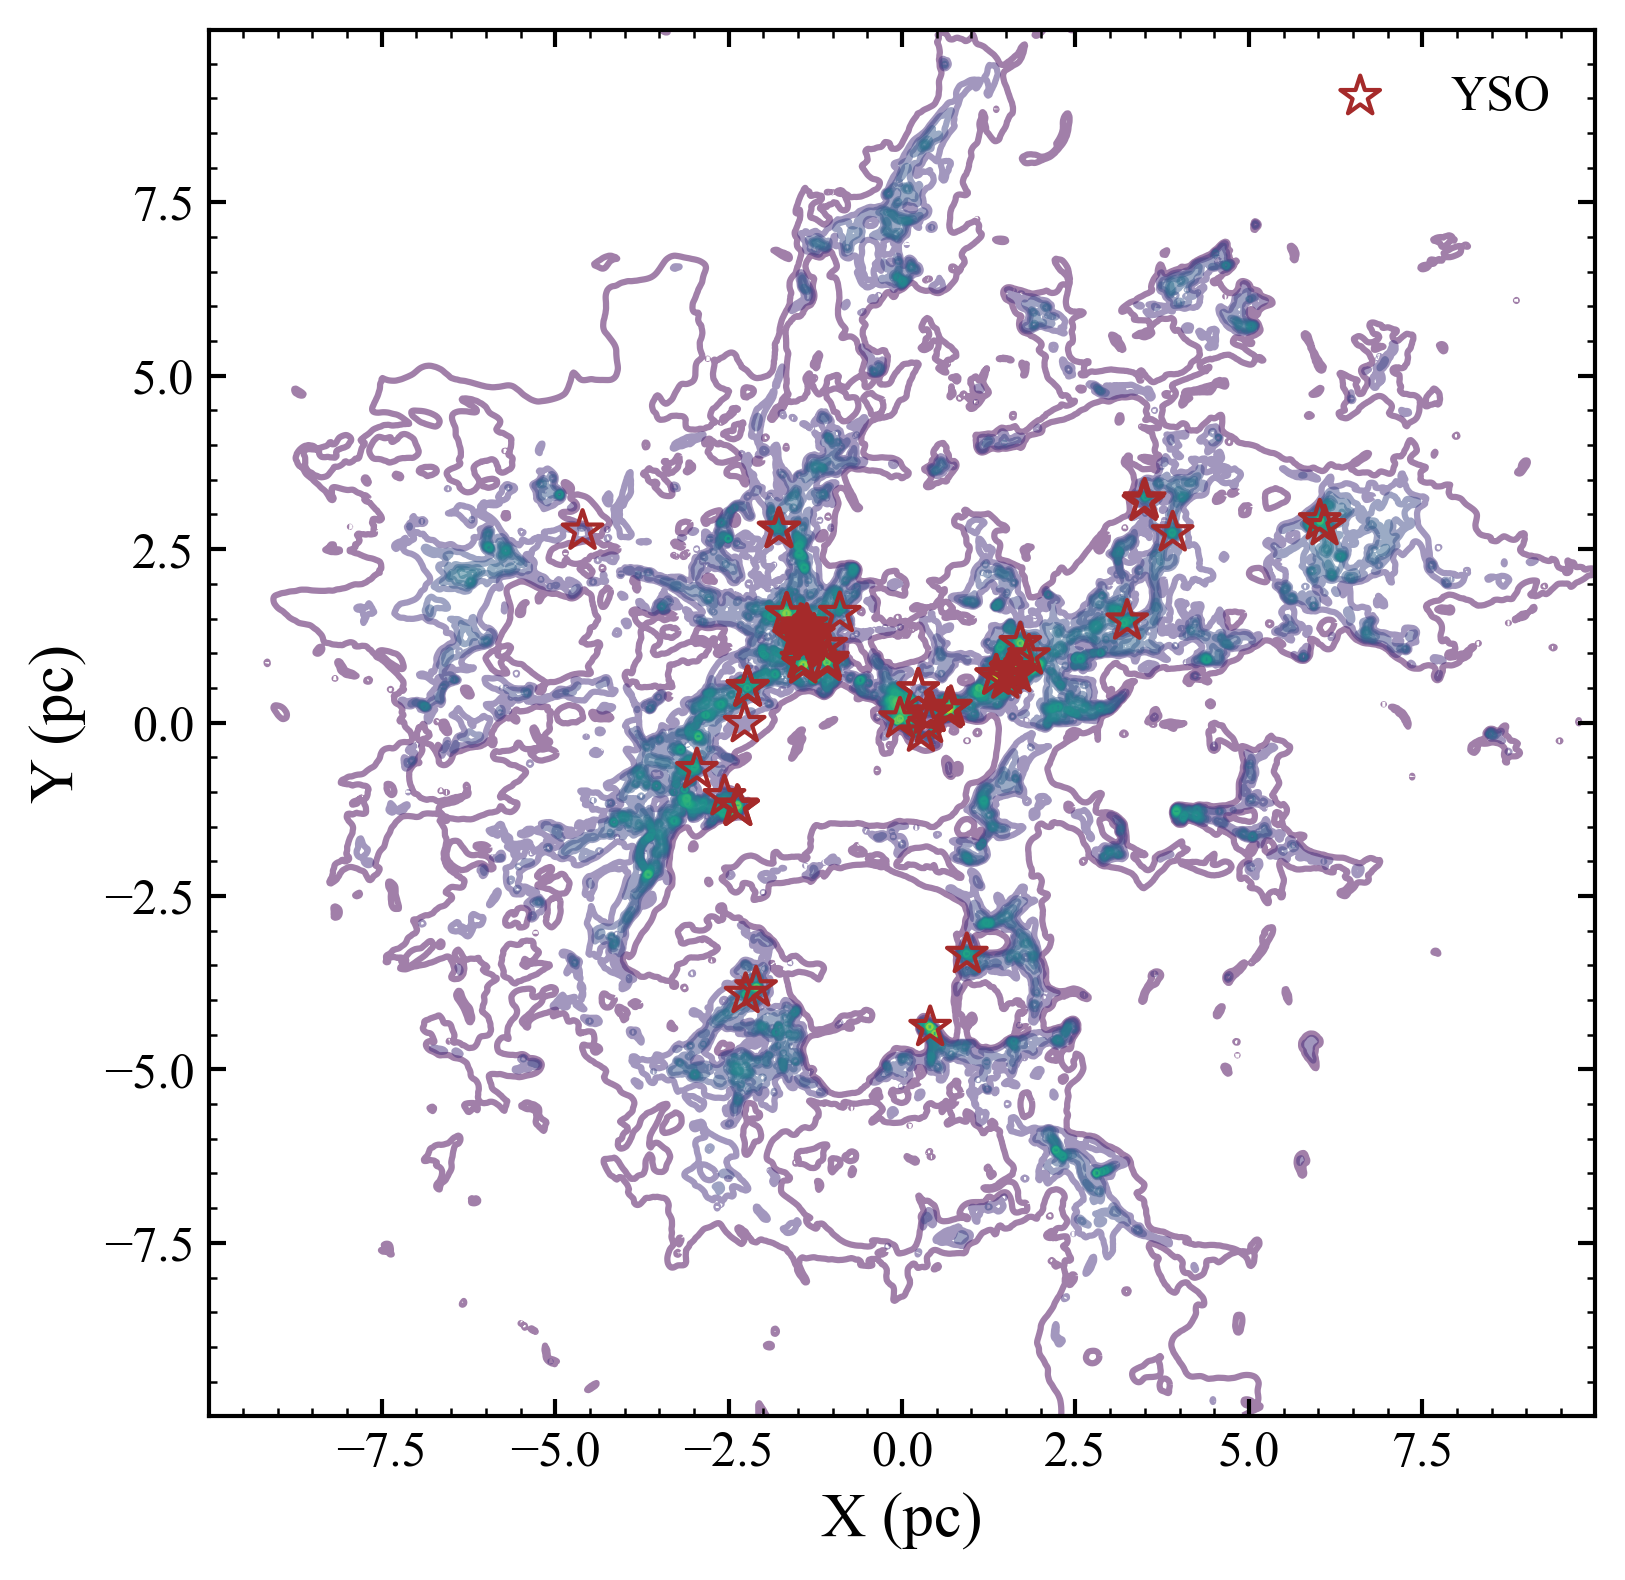

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot YSOs as brown stars
ax.scatter(50 - YSO_X, 50 - YSO_Y, marker='*', label="YSO", alpha=1, linewidths=1, 
           edgecolors='brown', facecolor="None", zorder=2, s=100)

# Plot AGN contaminants as red circles
#ax.scatter(50 - AGN_x, 50 - AGN_y, marker='o', label="AGN", alpha=1, linewidths=1, 
#edgecolors='red', facecolor="None", zorder=2, s=70)

# Contour plot for surface density
p = ax.contour(50 - X, 50 - Y, Surface_Den, levels=200, norm='log', cmap="viridis", 
               alpha=0.5, zorder=1)

# Colorbar (optional, uncomment if needed)
# fig.colorbar(p, label=r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$")

# Formatting
ax.set_aspect('equal')
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.legend()
#plt.title('Surface Density Map with YSOs and AGN')

# Show plot
plt.show()

# Save figure
fig.savefig('mockobs_contourmap.png', bbox_inches='tight', dpi=300)


In [77]:
def SFE(cutoff):
    Box_Size = h5py.File("snaps/snapshot_3000.hdf5")["Header"].attrs["BoxSize"]
    surface_unit = 1 * (u.solMass / u.pc**2)
    L = Box_Size / 5
    Mask = new_den > cutoff * surface_unit
    A_i= (L / 1024)**2 * u.pc**2
    A = np.sum(Mask) *  A_i

    star_rate = SFR(len(df['YSOs'][df['YSO Surface Den'] > cutoff]), 0.5 , 0.5) * (u.solMass / u.Myr)

    sigmaStar_Rate = star_rate / A
  

    M_Gas = np.sum(A_i * new_den[Mask])
    
    
    
    new_G = G.to(u.pc**3/(u.solMass * u.Myr**2))
    
    t_ff_num = np.sum(A)**(3/2) * np.pi**(1/2)
    t_ff_denom = (8 * new_G * M_Gas)
    T_ff = (t_ff_num/t_ff_denom)**(1/2)
    #T_ff = (new_G * (M_Gas / np.sum (A**(3/2))))**(-1/2)
    #print(T_ff)
    star_efficiency = star_rate / (M_Gas / T_ff)


    return star_efficiency


In [78]:
numbers = []
for i in np.arange(65,2500,1):
    efficiency = SFE(i)
    numbers.append(efficiency)

NameError: name 'new_den' is not defined

In [79]:
accretion_SFE = "/Users/alexanderescamilla/cassi/data/snaps/YSOobjects/E_FF/snapshot_3000.e_ff_range_accretion.hdf5"

with h5py.File(accretion_SFE) as A:
    values = A["SFE_Acc"][:]        

NameError: name 'numbers' is not defined

findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: La

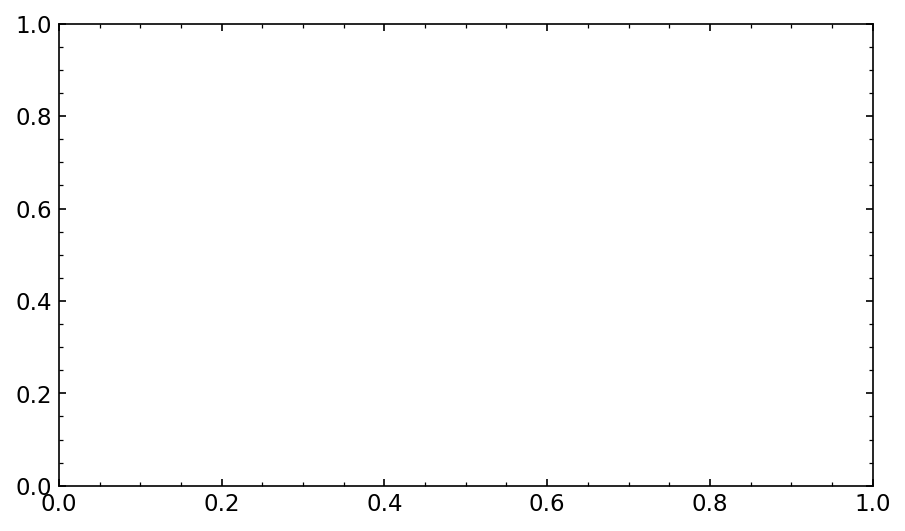

In [ ]:
Sigma_range = np.linspace(65,2500,2435)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(np.log10(Sigma_range), np.log10(numbers), label= 'Snapshot 3000', c='green', alpha = 0.7)
#ax.plot(np.log10(Sigma_range), np.log10(contaminated_E_FF), label= 'Contaminated 3000', c='red', alpha = 0.7)
ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 15)
ax.legend();
#ax.set_title(r"$\epsilon_{ff}$ vs. $\Sigma_{gas}$", fontsize = 20)
#fig.savefig('snap2000_plot', bbox_inches = 'tight')

ax.plot(np.log10(Sigma_range), np.log10(values), label="Snapshot 3000 accretion")

In [36]:
with h5py.File("../CASSI_Project-2024/mockobssnapshot_3000.AGN_e_ff_range.hdf5") as H:
    contaminated_N_YSO = H["NYSOs"][:]
    contaminated_E_FF = H["SFE_Values"][:]
with h5py.File("snaps/non_contamiated_E_FF/snapshot_3000.e_ff_range.hdf5") as L:
    N_YSO = L["NYSOs"][:]
    E_FF = L["SFE_Values"][:]
Sigma_range = np.linspace(65,2500,2435)

In [37]:
len(contaminated_N_YSO)

2435

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

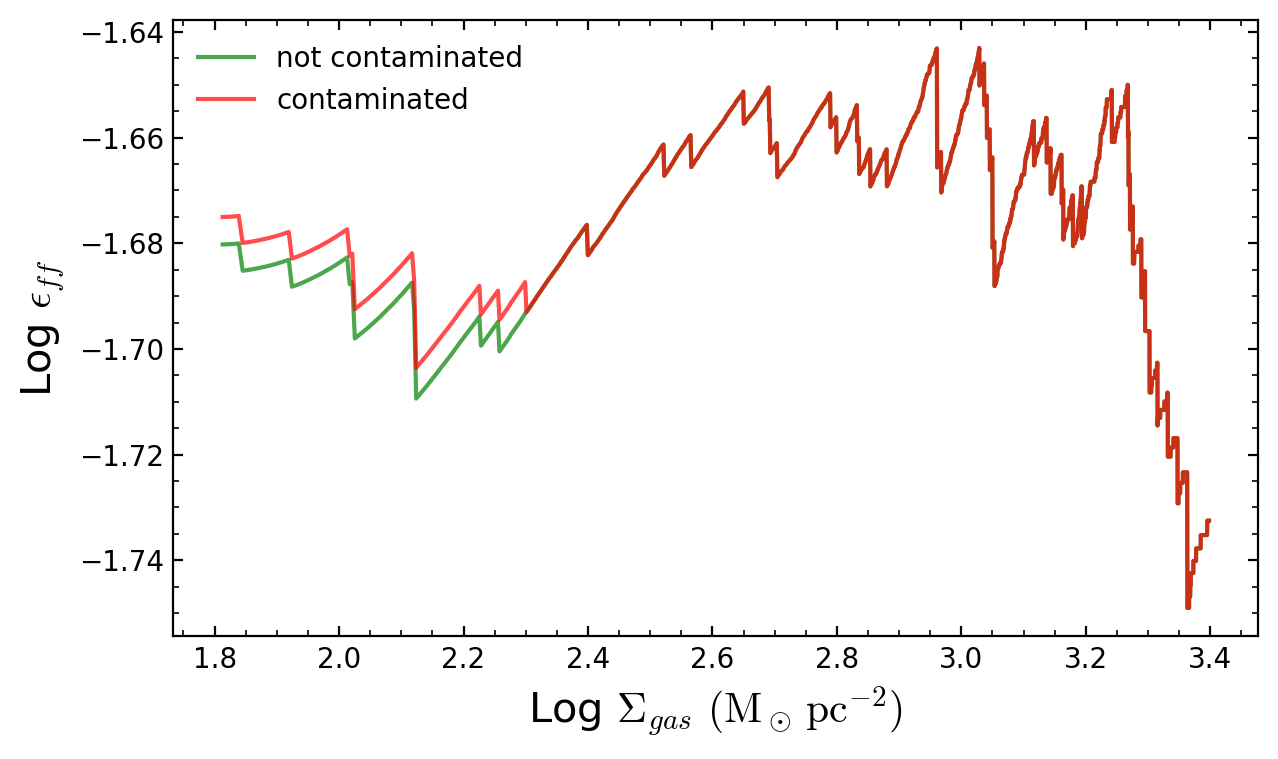

In [41]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(np.log10(Sigma_range), np.log10(E_FF), label= 'not contaminated', c='green', alpha = 0.7)
ax.plot(np.log10(Sigma_range), np.log10(contaminated_E_FF), label= 'contaminated', c='red', alpha = 0.7)
ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 15)
ax.legend();

In [67]:
with h5py.File("/Users/alexanderescamilla/cassi/data/AGN_snaps/snapshot_2000.AGN_e_ff_range.hdf5") as H:
    contaminated_N_YSO2000 = H["NYSOs"][:]
    contaminated_E_FF2000 = H["SFE_Values"][:]
with h5py.File("/Users/alexanderescamilla/cassi/data/AGN_snaps/snapshot_4000.AGN_e_ff_range.hdf5") as L:
    contaminatedN_YSO900 = L["NYSOs"][:]
    contaminatedE_FF900 = L["SFE_Values"][:]
with h5py.File("/Users/alexanderescamilla/cassi/data/AGN_snaps/snapshot_3000.AGN_e_ff_range.hdf5") as L:
    contaminatedN_YSO3000 = L["NYSOs"][:]
    contaminatedE_FF3000 = L["SFE_Values"][:]
Sigma_range = np.linspace(65,2500,2435)

In [68]:
contaminatedE_FF900

array([0.00853349, 0.00853725, 0.00854203, ..., 0.        , 0.        ,
       0.        ])

In [73]:
with h5py.File("/Users/alexanderescamilla/cassi/data/snaps/snapshot_2000.e_ff_range.hdf5") as H:
    N_YSO2000 = H["NYSOs"][:]
    E_FF2000 = H["SFE_Values"][:]
with h5py.File("/Users/alexanderescamilla/cassi/data/snaps/snapshot_4000.e_ff_range.hdf5") as L:
    N_YSO900 = L["NYSOs"][:]
    E_FF900 = L["SFE_Values"][:]
with h5py.File("/Users/alexanderescamilla/cassi/data/snaps/snapshot_3000.e_ff_range.hdf5") as L:
    N_YSO3000 = L["NYSOs"][:]
    E_FF3000 = L["SFE_Values"][:]

/var/folders/g4/b3gtnddx08d461bc9l775lnr0000gn/T/ipykernel_24042/4211525203.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(Sigma_range), np.log10(E_FF900),
/var/folders/g4/b3gtnddx08d461bc9l775lnr0000gn/T/ipykernel_24042/4211525203.py:18: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(Sigma_range), np.log10(contaminatedE_FF900),
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the f

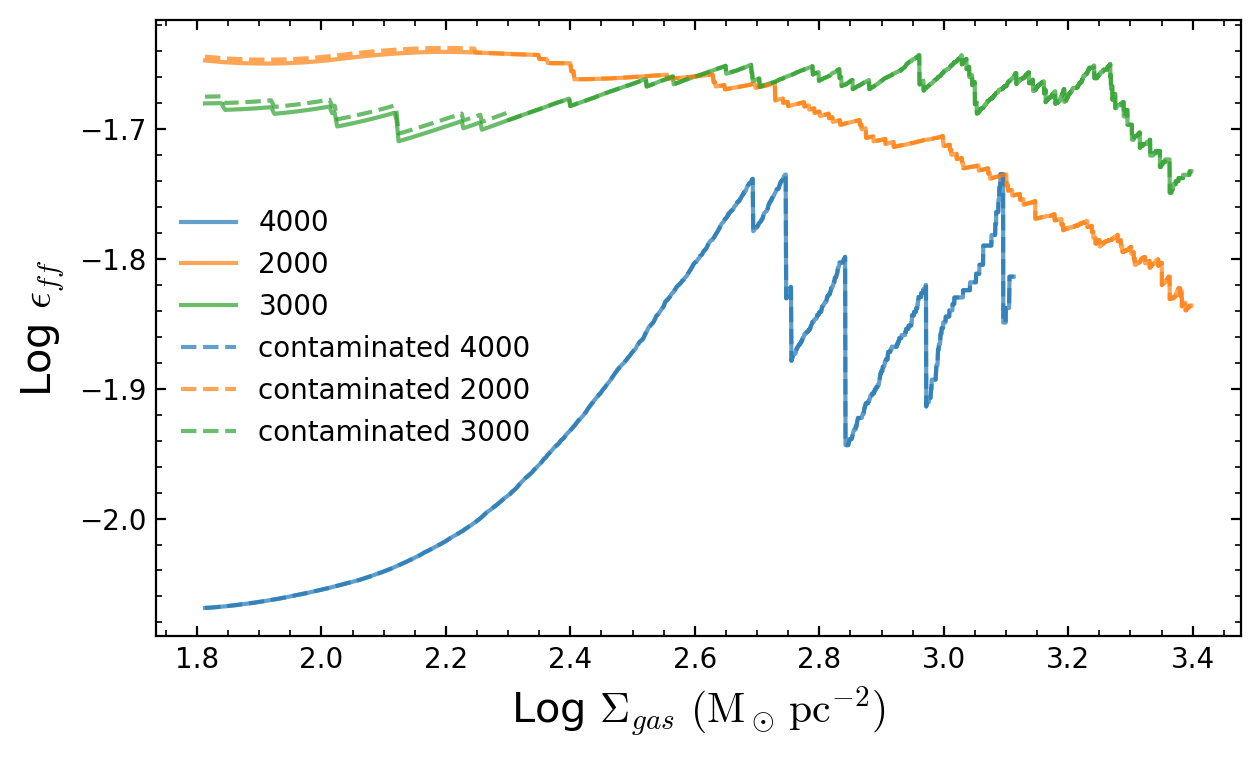

In [74]:
colors = {
    '990': 'tab:blue',
    '2000': 'tab:orange',
    '3000': 'tab:green'
}

fig, ax = plt.subplots(figsize=(7,4))

# Plot non-contaminated snapshots (solid lines) using their respective colors
ax.plot(np.log10(Sigma_range), np.log10(E_FF900),
        color=colors['990'], linestyle='-', label='4000', alpha=0.7)
ax.plot(np.log10(Sigma_range), np.log10(E_FF2000),
        color=colors['2000'], linestyle='-', label='2000', alpha=0.7)
ax.plot(np.log10(Sigma_range), np.log10(E_FF3000),
        color=colors['3000'], linestyle='-', label='3000', alpha=0.7)

# Plot contaminated snapshots (dashed lines) with the same colors as their corresponding snapshots
ax.plot(np.log10(Sigma_range), np.log10(contaminatedE_FF900),
        color=colors['990'], linestyle='--', label='contaminated 4000', alpha=0.7)
ax.plot(np.log10(Sigma_range), np.log10(contaminated_E_FF2000),
        color=colors['2000'], linestyle='--', label='contaminated 2000', alpha=0.7)
ax.plot(np.log10(Sigma_range), np.log10(contaminatedE_FF3000),
        color=colors['3000'], linestyle='--', label='contaminated 3000', alpha=0.7)

ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize=15)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize=15)
ax.legend()
plt.show()

In [40]:
!pwd

/Users/alexanderescamilla/cassi/data


In [320]:
low_res_eff = np.sort(glob("./snaps/240E_FF/" + "/*.hdf5"))

In [321]:
low_res_eff

array(['./snaps/240E_FF/snapshot_3000.e_ff_range.hdf5'], dtype='<U45')

In [322]:
mid_res_eff = np.sort(glob("./snaps/480E_FF/" + "/*.hdf5"))

In [323]:
high_res_eff = np.sort(glob("./snaps/1024E_FF/" + "/*.hdf5"))

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

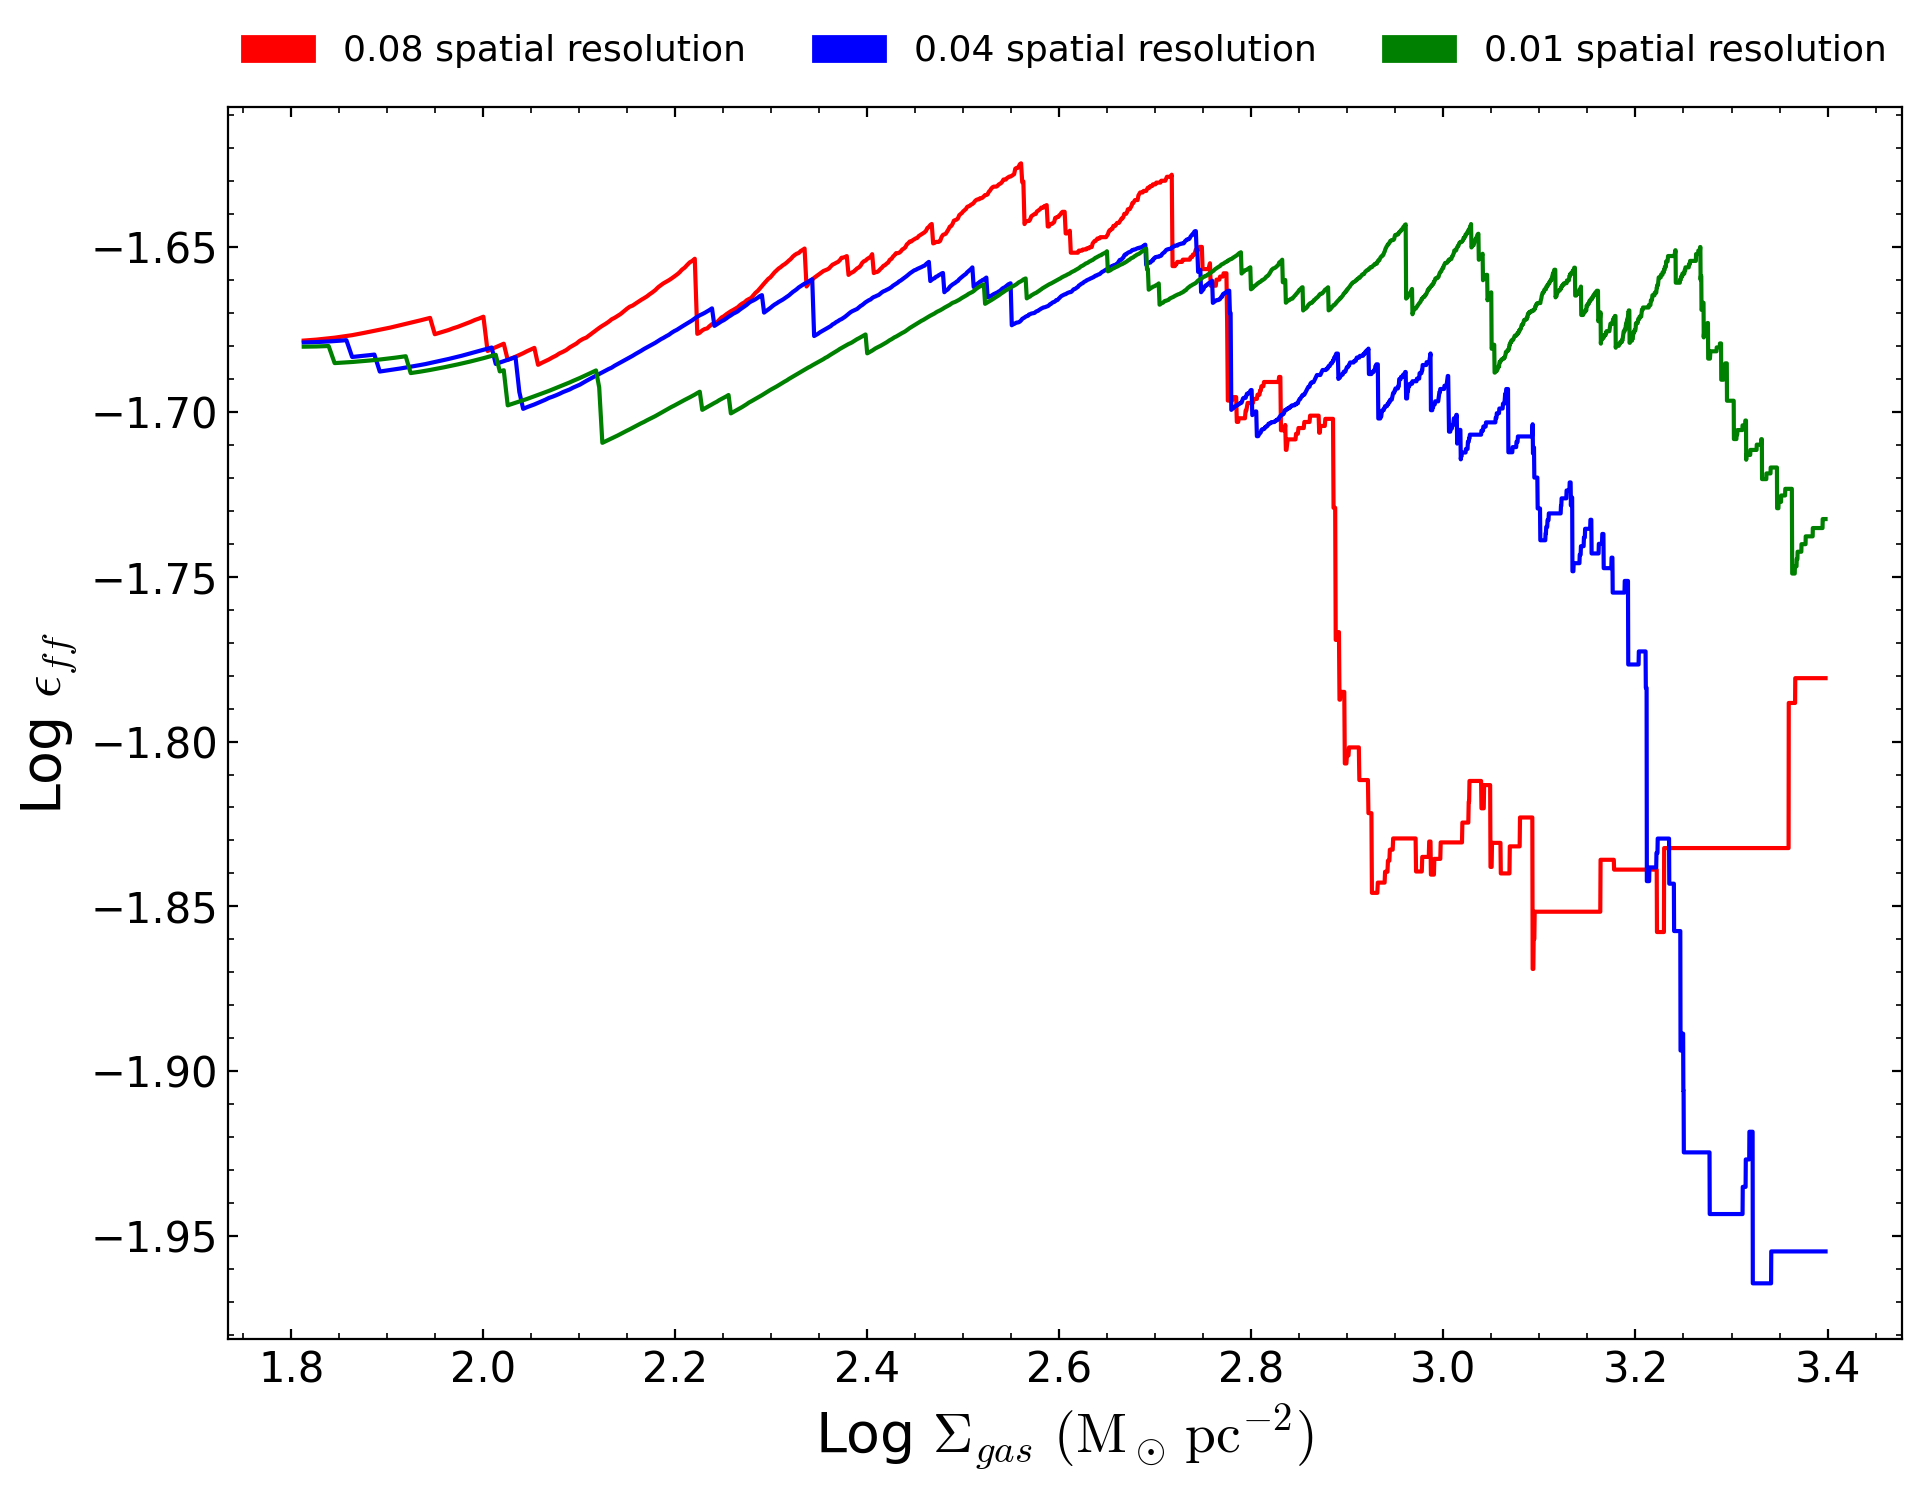

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

In [327]:
fig, ax = plt.subplots(figsize=(12,8))
for i,j,k in zip(low_res_eff, mid_res_eff, high_res_eff):
    with h5py.File(str(i), 'r') as F:
        values = F["SFE_Values"][:]
        mask = (~np.isnan(values)) & (values > 0)
        real = values[mask]
        x_range = np.linspace(65,2500,len(real))
        ax.plot(np.log10(x_range), np.log10(real), alpha=1, label = "0.08 spatial resolutiion", c='red');
    with h5py.File(str(j), 'r') as A:
        values = A["SFE_Values"][:]
        mask = (~np.isnan(values)) & (values > 0)
        real = values[mask]
        x_range = np.linspace(65,2500,len(real))
        ax.plot(np.log10(x_range), np.log10(real), alpha=1, label = "0.04 spatial resolution", c='blue');
    with h5py.File(str(k), 'r') as A:
        values = A["SFE_Values"][:]
        mask = (~np.isnan(values)) & (values > 0)
        real = values[mask]
        x_range = np.linspace(65,2500,len(real))
        ax.plot(np.log10(x_range), np.log10(real), alpha=1, label = "0.01 spatial resolution", c='green');
    
ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 20)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 20)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
red_patch = mpatches.Patch(color='red', label='0.08 spatial resolution')
blue_patch = mpatches.Patch(color='blue', label='0.04 spatial resolution')
green_patch = mpatches.Patch(color='green', label='0.01 spatial resolution')
ax.legend(handles=[red_patch, blue_patch, green_patch], bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3, fontsize = 13)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show();
fig.savefig('different_resolutions', facecolor='white', transparent=False, bbox_inches="tight")

ValueError: x and y must have same first dimension, but have shapes (2435,) and (100, 2435)

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

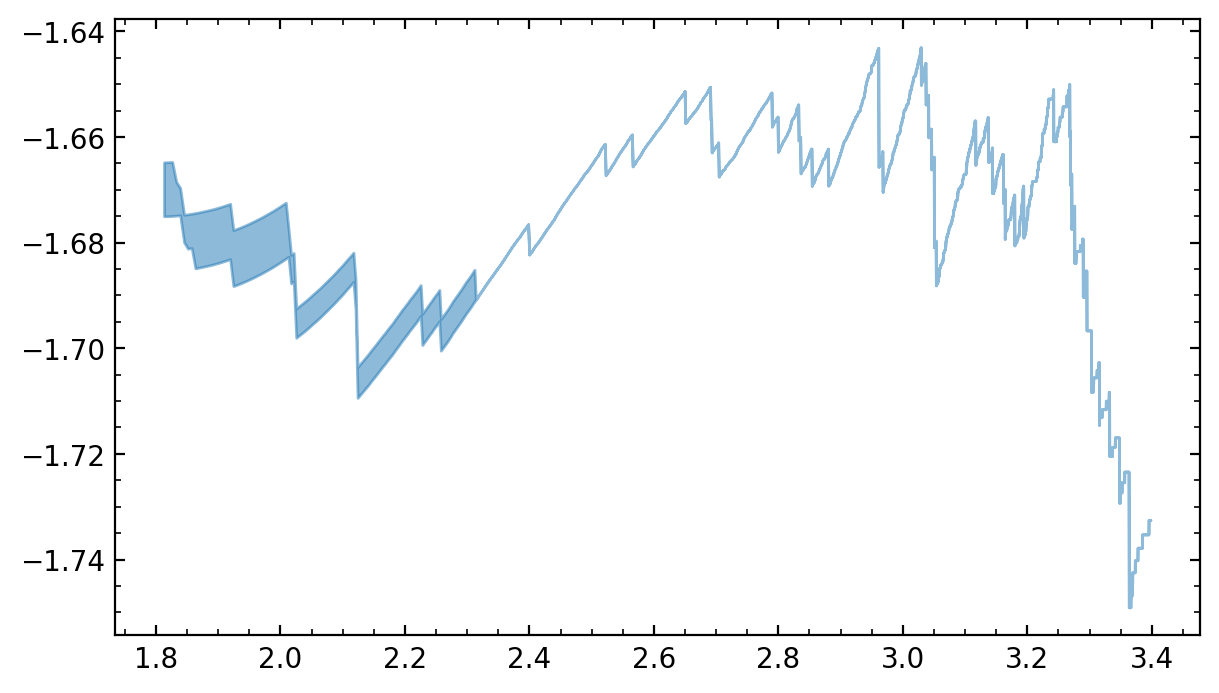

In [82]:


# --- Your function definitions ---
def read_yso_data(file_path):
    with h5py.File(file_path, "r") as f:
        YSO_X = f["X_pc"][:]
        YSO_Y = f["Y_pc"][:]
    return YSO_X, YSO_Y

def read_dust_data(file_path):
    with h5py.File(file_path, "r") as f:
        X = f["X_pc"][:]
        Y = f["Y_pc"][:]
        Surface_Den = f["SurfaceDensity_Msun_pc2"][:]
    new_den = Surface_Den.flatten() * (u.solMass / u.pc**2)
    dust_coords = np.c_[X.flatten(), Y.flatten()]
    return X, Y, Surface_Den, new_den, dust_coords

def inject_agn(Surface_Den, X, Y):
    # Calculate parameters for AGN contamination
    small_angle = ((10 * u.pc).to(u.kpc) / (0.6 * u.kpc))**2
    AGN_per_degree_squared = 9.0  # from literature
    area_deg2 = small_angle * (180 / np.pi)**2
    lambda_agn = AGN_per_degree_squared * area_deg2
    N_AGN = np.random.poisson(lam=lambda_agn)
    
    # Find the densest region
    max_dens_idx = np.unravel_index(np.argmax(Surface_Den), Surface_Den.shape)
    dense_x, dense_y = X[max_dens_idx], Y[max_dens_idx]
    
    # Sample AGN coordinates around the densest region
    AGN_x = np.random.normal(loc=dense_x, scale=5, size=N_AGN)
    AGN_y = np.random.normal(loc=dense_y, scale=5, size=N_AGN)
    return AGN_x, AGN_y

def combine_coordinates(YSO_X, YSO_Y, AGN_x, AGN_y):
    combined_x = np.concatenate([YSO_X, AGN_x])
    combined_y = np.concatenate([YSO_Y, AGN_y])
    return np.c_[combined_x, combined_y]

def compute_sfe_values(yso_surface_den, new_den, Box_Size, R_I, R_F, RES):
    new_G = G.to(u.pc**3 / (u.solMass * u.Myr**2)).value
    e_ff_range = []
    surface_unit = 1 * (u.solMass / u.pc**2)
    L = Box_Size / 5

    for i in np.arange(R_I, R_F, 1):
        threshold = i * surface_unit
        num_yso_at_surface_den = (yso_surface_den > threshold).sum()
        StarRate = (((num_yso_at_surface_den * 0.5) / 0.5) * (u.solMass / u.Myr))
        Mask = new_den > (i * surface_unit)
        A_i = (L / RES)**2 * u.pc**2
        A = (np.sum(Mask) * A_i).value
        M_Gas = np.sum(A_i * new_den[Mask]).value

        if M_Gas <= 0 or A <= 0:
            T_ff = np.nan
            star_efficiency = np.nan
        else:
            t_ff_num = (A ** (3 / 2)) * np.sqrt(np.pi)
            t_ff_denom = 8 * new_G * M_Gas
            T_ff = np.sqrt(t_ff_num / t_ff_denom)
            star_efficiency = (StarRate / (M_Gas / T_ff)).value

        e_ff_range.append(star_efficiency)
    return np.array(e_ff_range)
# --- End of your function definitions ---

# Set a random seed for reproducibility
np.random.seed(42)

# Simulation parameters
Box_Size = 100        # Simulation box size
R_I = 65              # Starting density cutoff
R_F = 2500            # Ending density cutoff
RES = 1024            # Resolution

# File paths for your data
yso_file = "snaps/YSOobjects/snapshot_3000.YSOobjects.hdf5"
dust_file = "snaps/test_high_dustemission/snapshot_3000.dustemission.hdf5"

# Read in your data once (fixed across resamplings)
YSO_X, YSO_Y = read_yso_data(yso_file)
X, Y, Surface_Den, new_den, dust_coords = read_dust_data(dust_file)

# Create the KDTree once (dust_coords remain constant)
tree = KDTree(dust_coords)

# Number of resampling iterations
n_iter = 100
sfe_list = []

# Loop over 100 realizations
for i in range(n_iter):
    # Inject AGN contamination randomly each time
    AGN_x, AGN_y = inject_agn(Surface_Den, X, Y)
    contaminated = combine_coordinates(YSO_X, YSO_Y, AGN_x, AGN_y)
    
    # Associate each (possibly contaminated) coordinate with a dust surface density
    _, idx = tree.query(contaminated)
    df = pd.DataFrame({
        "YSOs": contaminated[:, 0],
        "YSO Surface Den": new_den[idx]
    })
    yso_surface_den = df["YSO Surface Den"]
    
    # Compute SFE values over the range of density thresholds for this realization
    e_ff_range = compute_sfe_values(yso_surface_den, new_den, Box_Size, R_I, R_F, RES)
    sfe_list.append(e_ff_range)

# Convert list to numpy array; shape: (n_iter, number_of_density_cutoffs)
sfe_array = np.array(sfe_list)
density_cutoffs = np.arange(R_I, R_F, 1)

# Compute the 16th and 84th percentiles, and the mean, at each density cutoff
lower_percentile = np.percentile(sfe_array, 25, axis=0)
upper_percentile = np.percentile(sfe_array, 75, axis=0)
mean_sfe = np.median(sfe_array, axis=0)

# Plot the results in log-log space with updated style
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the 16th-84th percentile range as a filled region
ax.fill_between(np.log10(density_cutoffs),
                np.log10(lower_percentile),
                np.log10(upper_percentile),
                color='tab:blue', alpha=0.5, label=' 25 and 75 Percentile Range')

# Plot the mean SFE as a solid line
ax.plot(np.log10(density_cutoffs), np.log10(sfe_array),
        color='tab:green', linestyle='-', label='SFE', alpha=0.7)

# Set axis labels with LaTeX formatting and adjust font sizes
ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize=15)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize=15)
ax.legend()

plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: La

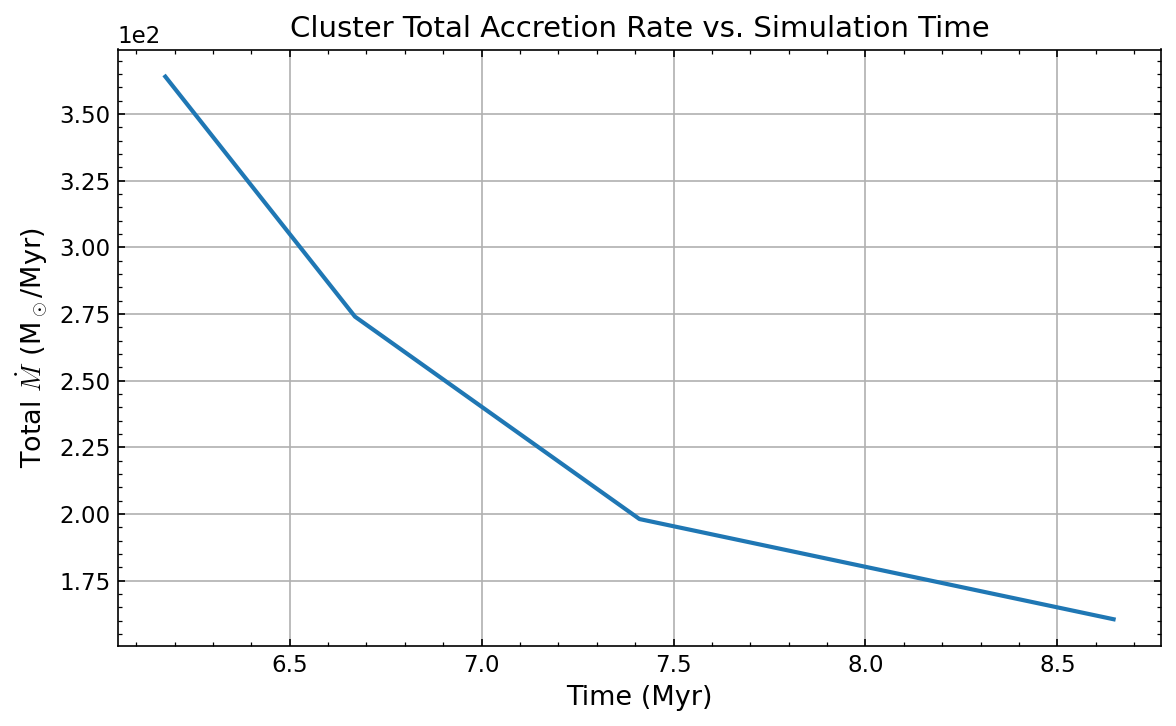

In [56]:
import h5py
import matplotlib.pyplot as plt

# Path to your HDF5 output file
fpath = '/Users/alexanderescamilla/cassi/data/snaps/accretion_histories/accretion_histories.hdf5'

# Open the file and read the cluster-wide datasets
with h5py.File(fpath, 'r') as f:
    times = f['Cluster/Time_Myr'][:]      # array of times in Myr
    total_mdot = f['Cluster/Total_Mdot'][:]  # array of total accretion rates

# Plot
plt.figure(figsize=(8, 5))
plt.plot(times, total_mdot, linewidth=2)
plt.xlabel('Time (Myr)')
plt.ylabel('Total $\\dot M$ (M$_\\odot$/Myr)')
plt.title('Cluster Total Accretion Rate vs. Simulation Time')
plt.grid(True)
plt.tight_layout()
plt.show()
